# Adversarial Search: Playing Connect 4

Student Name: [Add your name]

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: [your initials]

## Learning Outcomes

* Implement adversarial search algorithms for strategic game play.
* Analyze and optimize search in complex game spaces.
* Design effective heuristic evaluation functions.
* Compare performance across different agent strategies.
* Evaluate algorithmic trade-offs between decision quality and efficiency.

## Instructions

Total Points: Undergraduates 100, graduate students 110

Complete this notebook and submit it. The notebook needs to be a complete project report with your implementation, documentation including a short discussion of how your implementation works and your design choices, and experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.


## Introduction

You will implement different versions of agents that play Connect 4:

> "Connect 4 is a two-player connection board game, in which the players choose a color and then take turns dropping colored discs into a seven-column, six-row vertically suspended grid. The pieces fall straight down, occupying the lowest available space within the column. The objective of the game is to be the first to form a horizontal, vertical, or diagonal line of four of one's own discs." (see [Connect Four on Wikipedia](https://en.wikipedia.org/wiki/Connect_Four))

Note that [Connect-4 has been solved](https://en.wikipedia.org/wiki/Connect_Four#Mathematical_solution)
in 1988. A connect-4 solver with a discussion of how to solve different parts of the problem can be found here: https://connect4.gamesolver.org/en/

## Task 1: Defining the Search Problem [10 point]

Define the components of the search problem:

* Initial state
* Actions
* Transition model (result function)
* Goal state (terminal state and utility)

Describe each component and then implement it as a function that can be used by search algorithms.

In [143]:
# Your answer goes here.

# Defining the Components of a Search Problem
## Answer

1. Trạng thái khởi đầu (Initial State)

- Trạng thái khởi đầu là cấu hình ban đầu của trò chơi trước khi bất kỳ người chơi nào thực hiện nước đi.
- Nó chứa toàn bộ thông tin cần thiết để bắt đầu trò chơi.

- Trong trò Connect Four, trạng thái khởi đầu là một bảng 6×7 trống.
 
- Mỗi ô đều rỗng (thường biểu diễn bằng giá trị 0).



2. Actions

- Actions mô tả tất cả các hành động hợp lệ mà người chơi có thể thực hiện tại một trạng thái nhất định.

- Trong Connect Four, mỗi hành động tương ứng với việc thả quân vào một cột chưa đầy (có 7 hành động nếu chưa có cột nào đầy).

- Tập hành động thay đổi linh hoạt trong suốt trò chơi (khi cột đầy thì hành động đó không còn hợp lệ)

3. Mô hình chuyển trạng thái (Transition Model / Result Function)
- Mô hình chuyển trạng thái (hay hàm kết quả) mô tả cách một hành động biến đổi trạng thái hiện tại sang trạng thái mới.

- Trong Connect Four, khi người chơi chọn một cột, mô hình này sẽ tạo ra một bản sao mới của bàn cờ và đặt quân cờ vào vị trí thấp nhất có thể trong cột đó.



4. Trạng thái đích (Goal / Terminal State) và Hàm tiện ích (Utility Function)

- Trạng thái đích (hoặc trạng thái kết thúc) là khi trò chơi đạt đến điểm không thể thực hiện hành động hợp lệ nào khác.

- Một trạng thái được xem là kết thúc nếu:

- Có một người chơi đạt được 4 quân liên tiếp (theo hàng ngang, dọc hoặc chéo), hoặc

- Bàn cờ đã đầy mà không ai thắng (hòa).

- Hàm tiện ích (Utility) là hàm gán giá trị số cho các trạng thái kết thúc, thể hiện mức độ tốt xấu của trạng thái đó đối với người chơi:

- Giá trị dương (ví dụ +1 hoặc +∞) → AI thắng.

Giá trị âm (ví dụ −1 hoặc −∞) → AI thua.

Giá trị 0 → Hòa.
# Your code/answer goes here.


How big is the state space? Give an estimate and explain it.

In [144]:
# Your answer goes here.


## Ước lượng kích thước không gian trạng thái của Connect Four

Bàn cờ có 42 ô
- Mỗi ô có 3 giá trị (-1 , 1 , 0) 
 
Vậy không gian trạng thái trên là 3^42



How big is the game tree that minimax search will go through? Give an estimate and explain it.

In [145]:
# Your answer goes here.


## Ước lượng độ phức tạp của bài toán

- Bàn cờ chuẩn có 6 hàng × 7 cột = 42 ô.

- mỗi trạng thái là 1 bàn cờ với số đã điền

- Mỗi 1 trạng thái sẽ có 7 khả năng tương ứng với 7 cột

Trường hợp nếu 2 người đều chơi tối ưu và không mắc sai phạm có thể sấp xỉ tất cả các ô của bàn cờ hoặc là hòa

Vậy trường hợp tệ nhất là 7^42


## Task 2: Game Environment and Random Agent [25 point]

Use a numpy character array as the board.

In [146]:
import numpy as np

def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=0)

print(empty_board())    

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


The standard board is $6 \times 7$ but you can use smaller boards to test your code. Instead of colors (red and yellow), I use 1 and -1 to represent the players. Make sure that your agent functions all have the from: `agent_type(board, player = 1)`, where board is the current board position (in the format above) and player is the player whose next move it is and who the agent should play (as 1 and -1).

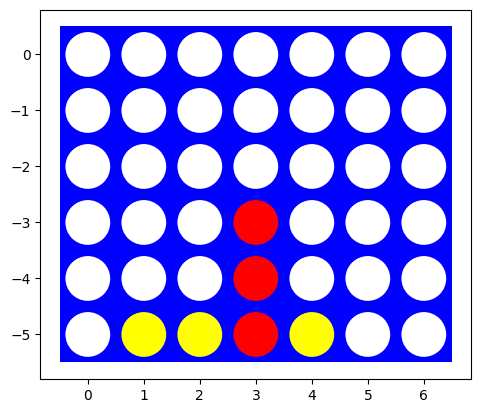

In [147]:
# Visualization code by Randolph Rankin

import matplotlib.pyplot as plt

def visualize(board):
    plt.axes()
    rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
    circles=[]
    for i,row in enumerate(board):
        for j,val in enumerate(row):
            color='white' if val==0 else 'red' if val==1 else 'yellow'
            circles.append(plt.Circle((j,i*-1),0.4,fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()

board = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0,-1,-1, 1,-1, 0, 0]]
visualize(board)

Implement helper functions for:

* A check for available actions in each state `actions(state)`.
* The transition model `result(state, player, action)`.
* Check for terminal states `terminal(state)`.
* The utility function `utility(state, player)`.

The player argument is used so your agent can play red or yellow.
Make sure that all these functions work with boards of different sizes (number of columns and rows).
You can follow the [tic-tac-toe example from class.](https://colab.research.google.com/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_definitions.ipynb)

In [148]:
# Your code/ answer goes here.
import copy
import random
def player(board):
    flat = [cell for row in board for cell in row]
    count_1 = flat.count(1)
    count_neg1 = flat.count(-1)
    sum = count_1 + count_neg1 #Tính tổng số quân cờ
    return 1 if sum % 2 == 0 else -1 #Nếu tổng là chẵn thì lượt đánh tiếp theo thuộc về agent 1, và ngược lại
def actions(last_row_each_col,move_ordering): #Hàm liệt kê các trạng thái hiện có , Trả về list các cột có thể đánh
    available = []
    for col, row_idx in enumerate(last_row_each_col):
        if row_idx >= 0:
            available.append(col)
    if move_ordering == 1:
        center = len(last_row_each_col) // 2
        available.sort(key=lambda c: abs(center - c))  # gần trung tâm hơn -> ưu tiên hơn
    else:
        random.shuffle(available)
    return available
    
# ---- result (apply action) ----
def result(board, last_row_each_col, action, player_to_move):
    col = action
    #copy 
    new_board = copy.deepcopy(board)
    new_last = copy.deepcopy(last_row_each_col)  # shallow copy of ints
    row_to_place = new_last[col]
    new_board[row_to_place][col] = player_to_move
    new_last[col] -= 1
    return new_board, new_last

def terminal_test(board, last_row_each_col):
    """
    Tra ve True neu tro choi ket thuc (co nguoi thang hoac hoa), nguoc lai tra ve False.
    """
    # Check for win
    for r in range(len(board)):
        for c in range(len(board[0])):
            if board[r][c] != 0:
                player = board[r][c]
                # Check horizontal
                if c <= len(board[0]) - 4 and all(board[r][c+i] == player for i in range(4)):
                    return player ,True
                # Check vertical
                if r <= len(board) - 4 and all(board[r+i][c] == player for i in range(4)):
                    return player, True
                # Check diagonal 
                if r >= 3 and c <= len(board[0]) - 4 and all(board[r-i][c+i] == player for i in range(4)):
                    return player, True
                # Check diagonal \
                if r <= len(board) - 4 and c <= len(board[0]) - 4 and all(board[r+i][c+i] == player for i in range(4)):
                    return player ,True
    # Check for draw
    if all(row == -1 for row in last_row_each_col):
        return 0, True
    return 0 , False

    
    
def utility(board, last_row_each_col):
    winner, is_terminal = terminal_test(board, last_row_each_col)
    if is_terminal:
        if winner == 1:
            return 10
        elif winner == -1:
            return 10
        else:
            return 0 
    return 0  

Implement an agent that plays randomly. Make sure the agent function receives as the percept the board and returns a valid action. Use an agent function definition with the following signature (arguments):

`def random_player(board, player = 1): ...`

The argument `player` is used for agents that do not store what color they are playing. The value passed on by the environment should be 1 ot -1 for player red and yellow, respectively.  See [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) for an example.

In [149]:
# Your code/ answer goes here.
import random
def random_agent(board, last_row_each_col):
    available_actions = actions(last_row_each_col,False)
    return random.choice(available_actions)

Let two random agents play against each other 1000 times. Look at the [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) to see how the environment uses the agent functions to play against each other.

How often does each player win? Is the result expected?

In [150]:
# Your code/ answer goes here.
def play_game():
    board = empty_board()   #Khởi tạo bàn cờ trống
    last_row_each_col = [len(board) - 1] * len(board[0]) # Khởi tạo các cột có thể thả quân cờ
    current_agent = player(board) #Hàm xác định người chơi hiện tại
    while True:
        action = random_agent(board, last_row_each_col)
        board, new_last_row_each_col = result(board, last_row_each_col, action, current_agent)
        winner, is_terminal = terminal_test(board, new_last_row_each_col)
         #Kiểm tra trận đấu kết thúc chưa và trả về người thắng
        if is_terminal:
            if winner == 1:
                return 1
            elif winner == -1:
                return -1
            else:
                return 0
        #Cập nhật các cột mới có thể đánh sau khi agent thực hiện hành động
        last_row_each_col = new_last_row_each_col
        #Cập nhật lại lượt của agent hiện tại
        current_agent = player(board)
def count_winner(): #Hàm thống kê thắng thua cả 2 agent
    dic = {
        1: 0,
        0: 0,
        -1:0
    }
    for i in range(0,1000):
        dic[play_game()]+=1 
    return dic
print(count_winner())

{1: 577, 0: 1, -1: 422}


## Task 3: Minimax Search with Alpha-Beta Pruning

### Implement the Search [20 points]

Implement minimax search starting from a given board for specifying the player.

__Important Notes:__
* You can use code from the [tic-tac-toe example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_alpha_beta_tree_search.ipynb).
* Make sure that all your agent functions have a signature consistent with the random agent above and that it [uses a class to store state information.](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb)
This is essential to be able play against agents from other students later.
* The game tree for a $6 \times 7$ board is huge and optimal algorithms need to visit each or a large percentage of all nodes in the tree. You can experiment with smaller boards like a $4 \times 4$ board first.

In [151]:
    # Your code/ answer goes here.
class Node:
        def __init__(self, board, last_row_each_col, parent=None):
            self.board = board #Bàn cờ
            self.last_row_each_col = last_row_each_col #Số cột khả dụng có thể đánh
            self.parent = parent #Node cha 
            self.children = [] #Các trạng thái con
            self.value = None #Giá trị tối ưu của trạng thái hiện tại
            
    # player(board) == 1 if player(board) == 1 else -1

def minimax_decision(node,depth,max_depth,move_ordering=False):
        if terminal_test(node.board, node.last_row_each_col)[1] or depth == max_depth: # Dừng khi đạt độ sâu tối đa hoặc kết thúc 
            node.value = utility(node.board, node.last_row_each_col)
            return None,node.value
        available_actions = actions(node.last_row_each_col, move_ordering) # Sinh ra trạng thái tiếp theo có thể đi
        current_player = player(node.board) # Hàm trả về lượt người chơi dựa trên trạng thái bàn cờ hiện tại
        best_value = float('-inf') if current_player == 1 else float('inf')
        for action in available_actions: #Lặp qua từng cột trong list các cột khả dụng
            new_board, new_last = result(node.board, node.last_row_each_col, action, current_player) # Trả về trạng thái mới giả lập
            child_node = Node(new_board, new_last, parent=node) # Khởi tạo đối tượng node mới
            node.children.append(child_node) #Thêm node mới vào node hiện tại
            _ ,value = minimax_decision(child_node,depth+1,max_depth,move_ordering) # trả về giá trị tốt nhất ứng với từng người chơi và action để đạt được giá trị đấy
            if current_player == 1:  # Maximizing player
                if value > best_value:
                    best_value = value
                    best_action = action
            else:  # Minimizing player
                if value < best_value:
                    best_value = value
                    best_action = action
        node.value = best_value
        best_action = random.choice(available_actions) if available_actions else None  #chọn cột còn khả dụng ngẫu nhiên nếu không có nước đi nào tối ưu 
        return best_action, best_value #Trả về cột ứng với giá trị tối ưu và giá trị tối ưu đó 

def play_game():
        board = empty_board() #Khởi tạo trạng thái bàn cờ rỗng , với giá trị mặc định của hàm
        last_row_each_col = [len(board) - 1] * len(board[0])
        current_agent = player(board)
        root_node = Node(board, last_row_each_col)
        while True:
            action, _ = minimax_decision(root_node, depth=0, max_depth=4)
            board, new_last_row_each_col = result(board, last_row_each_col, action, current_agent)
            visualize(board)
            winner, is_terminal = terminal_test(board, new_last_row_each_col)
            if is_terminal:
                if winner == 1:
                    print("Player 1 wins!")
                elif winner == -1:
                    print("Player -1 wins!")
                else:
                    print("It's a draw!")
                break
            last_row_each_col = new_last_row_each_col
            current_agent = player(board)
# play_game()


Experiment with some manually created boards (at least 5) to check if the agent spots winning opportunities.

Bảng 1
Trang thai ban dau 


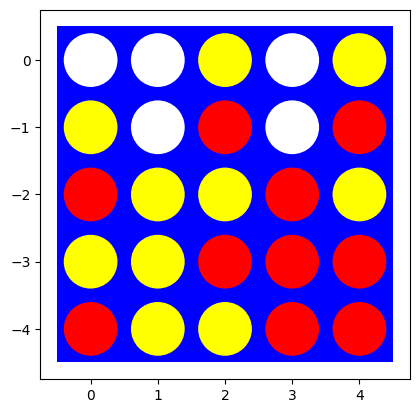

CPU times: total: 0 ns
Wall time: 0 ns
Gia tri cuoi cung 


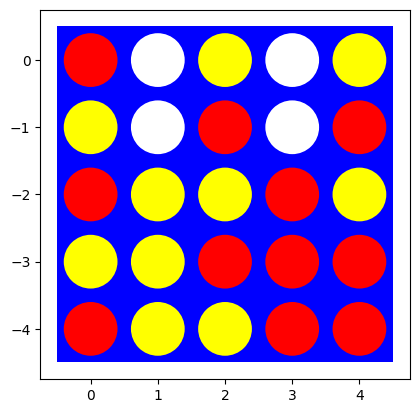

Bảng 2
Trang thai ban dau 


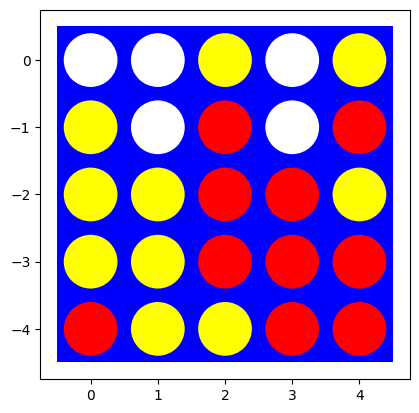

CPU times: total: 0 ns
Wall time: 0 ns
Gia tri cuoi cung 


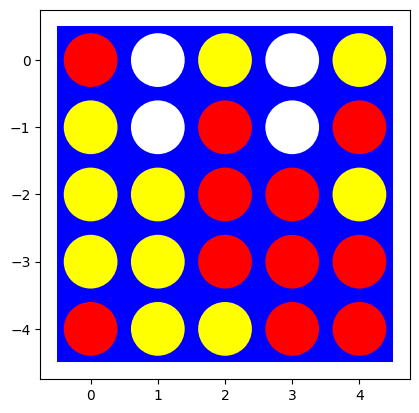

Bảng 3
Trang thai ban dau 


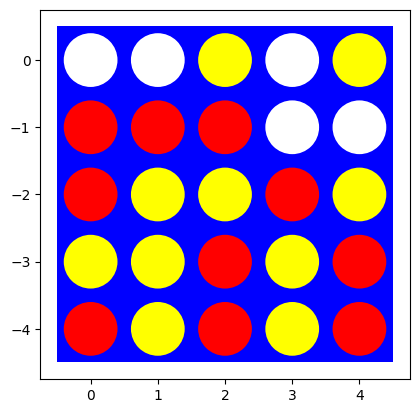

CPU times: total: 0 ns
Wall time: 0 ns
Gia tri cuoi cung 


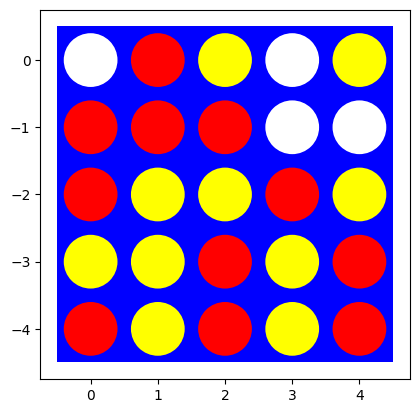

Bảng 4
Trang thai ban dau 


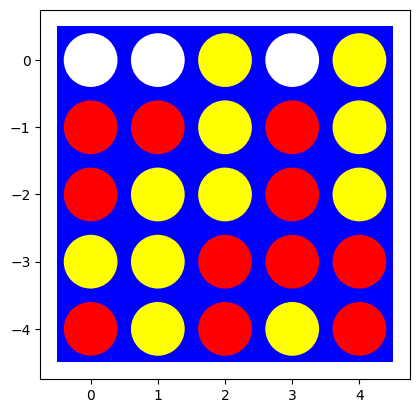

CPU times: total: 0 ns
Wall time: 0 ns
Gia tri cuoi cung 


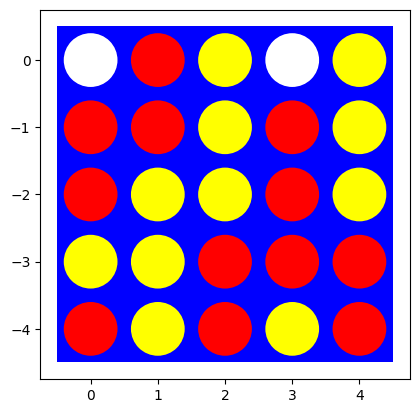

Bảng 5
Trang thai ban dau 


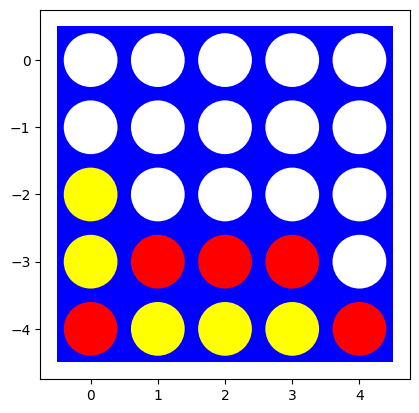

CPU times: total: 0 ns
Wall time: 0 ns
Gia tri cuoi cung 


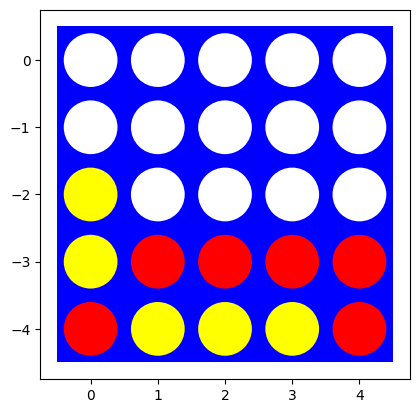

In [152]:
# Your code/ answer goes here.
#Bảng 1 
board = [[0, 0, -1, 0, -1],
         [-1, 0, 1, 0, 1],
         [1, -1, -1, 1, -1],
         [-1, -1, 1, 1, 1],
         [1, -1, -1, 1, 1]]

board = np.array(board)
print("Bảng 1")
print(f"Trang thai ban dau ")
visualize(board)
last_row_each_col = np.sum(board == 0, axis=0) - 1

node = Node(board,last_row_each_col)
%time 
action, _ = minimax_decision(node,0,4)

new_board, new_last_row_each_col = result(board, last_row_each_col, action, player(node.board))

print(f"Gia tri cuoi cung ")
visualize(new_board)

#Bảng 2

board = [[0, 0, -1, 0, -1],
         [-1, 0, 1, 0, 1],
         [-1, -1, 1, 1, -1],
         [-1, -1, 1, 1, 1],
         [1, -1, -1, 1, 1]]

board = np.array(board)
print("Bảng 2")
print(f"Trang thai ban dau ")
visualize(board)
last_row_each_col = np.sum(board == 0, axis=0) - 1

node = Node(board,last_row_each_col)
%time 
action, _ = minimax_decision(node,0,4)

new_board, new_last_row_each_col = result(board, last_row_each_col, action, player(node.board))

print(f"Gia tri cuoi cung ")
visualize(new_board)

#Bảng 3

board = [[0, 0, -1, 0, -1],
         [1, 1, 1, 0, 0],
         [1, -1, -1, 1, -1],
         [-1, -1, 1, -1, 1],
         [1, -1, 1, -1, 1]]
board = np.array(board)
print("Bảng 3")
print(f"Trang thai ban dau ")
visualize(board)
last_row_each_col = np.sum(board == 0, axis=0) - 1

node = Node(board,last_row_each_col)
%time 
action, _ = minimax_decision(node,0,4)

new_board, new_last_row_each_col = result(board, last_row_each_col, action, player(node.board))

print(f"Gia tri cuoi cung ")
visualize(new_board)
#Bảng 4

board = [[0, 0, -1, 0, -1],
         [1, 1, -1, 1, -1],
         [1, -1, -1, 1, -1],
         [-1, -1, 1, 1, 1],
         [1, -1, 1, -1, 1]]
board = np.array(board)
print("Bảng 4")
print(f"Trang thai ban dau ")
visualize(board)
last_row_each_col = np.sum(board == 0, axis=0) - 1

node = Node(board,last_row_each_col)
%time 
action, _ = minimax_decision(node,0,4)

new_board, new_last_row_each_col = result(board, last_row_each_col, action, player(node.board))

print(f"Gia tri cuoi cung ")
visualize(new_board)


#Bảng 5

board = [[0, 0, 0, 0, 0],
         [0, 0, 0,0, 0],
         [-1, 0, 0, 0, 0],
         [-1, 1, 1, 1, 0],
         [1, -1, -1, -1, 1]]
board = np.array(board)
print("Bảng 5")
print(f"Trang thai ban dau ")
visualize(board)
last_row_each_col = np.sum(board == 0, axis=0) - 1

node = Node(board,last_row_each_col)
%time 
action, _ = minimax_decision(node,0,4)

new_board, new_last_row_each_col = result(board, last_row_each_col, action, player(node.board))

print(f"Gia tri cuoi cung ")
visualize(new_board)


How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns/rows. Explain why using this algorithm on a standard $6 \times 7$ board is not feasible.

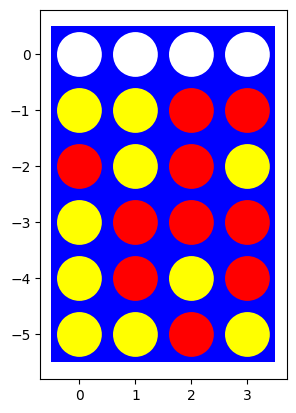

make decision took: 1.3356208801269531 miliseconds


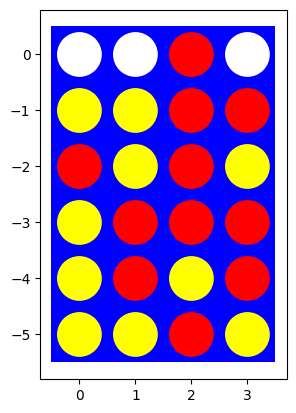

In [ ]:
# Your code/ answer goes here.
import time
board = [[0, 0, 0, 0],
          [-1, -1, 1, 1],
          [1, -1, 1, -1],
          [-1, 1, 1, 1],
          [-1, 1, -1, 1],
          [-1, -1, 1, -1]]

board = np.array(board)
last_row_each_col = np.sum(board == 0, axis=0) - 1
visualize(board)
node = Node(board,last_row_each_col)
t0 = time.time()
action, _ = minimax_decision(node,0,6) # độ sâu bắt đầu từ 0 và tối đa khi bằng 6
t1 = time.time()
print(f"make decision took: {(t1 - t0) * 1e3} miliseconds")
new_board, new_last_row_each_col = result(board, last_row_each_col, action, player(node.board)) 
visualize(new_board)
#Explain why using this algorithm on a standard 6 x 7 board is not feasible ?
#Giải thích nếu bàn cờ 6x7 và không giới hạn độ sâu thì tổng số trạng thái rất lớn có thể bằng 7^42

### Move ordering [5 points]

Starting the search with better moves will increase the efficiency of alpha-beta pruning. Describe and implement a simple move ordering strategy. Make a table that shows how the ordering strategies influence the time it takes to make a move?

Trang thai ban dau 


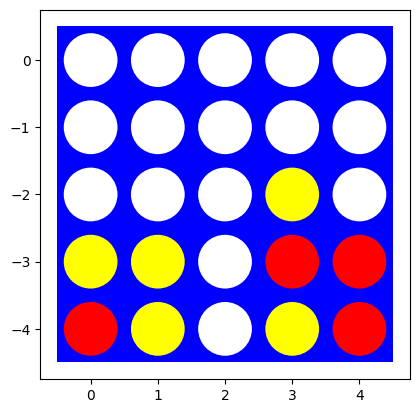

[2 2 4 1 2]
Using move ordering took: 28.084278106689453 miliseconds
Without move ordering took: 26.87835693359375 miliseconds


In [ ]:
# Your code/ answer goes here.
# Move Ordering

# Trong thuật toán Alpha-Beta pruning, hiệu quả cắt tỉa phụ thuộc vào thứ tự duyệt các nước đi.
# Chiến lược Move Ordering giúp sắp xếp nước đi sao cho các lựa chọn tiềm năng cao được xét trước, qua đó tăng khả năng cập nhật nhanh giá trị alpha và beta.

# Trong bài này, ta sử dụng chiến lược center-first, ưu tiên các cột ở trung tâm vì chúng thường tạo ra nhiều hướng thắng hơn trong trò Mean Connect-4.

# Ta sẽ custom lại hàm minimax đã code ở trên
import time



board = [[0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, -1, 0],
         [-1, -1, 0, 1, 1],
         [1, -1, 0, -1, 1]]
board = np.array(board)
print(f"Trang thai ban dau ")
visualize(board)
last_row_each_col = np.sum(board == 0, axis=0) - 1
print(last_row_each_col)
node = Node(board,last_row_each_col)
#so sánh Move_odering = True và False
t0 = time.time()
action, _ = minimax_decision(node,0,4,True)
t1 = time.time()
# new_board, new_last_row_each_col = result(board, last_row_each_col, action, player(node.board))
action, _ = minimax_decision(node,0,4,False)
t2 = time.time()
print(f"Using move ordering took: {(t1 - t0) * 1e3} miliseconds")
print(f"Without move ordering took: {(t2 - t1) * 1e3} miliseconds")




### The first few moves [5 points]

Start with an empty board. This is the worst case scenario for minimax search since it needs solve all possible games that can be played (minus some pruning) before making the decision. What can you do?

In [155]:
# # Your code/ answer goes here.
# . Giới hạn thời gian và độ sâu (Depth Limiting và Iterative Deepening)
# Iterative Deepening: Thay vì chạy thuật toán với một độ sâu cố định ngay từ đầu, hãy bắt đầu từ độ sâu 1, rồi 2, rồi 3... cho đến khi hết thời gian cho phép. Cách này đảm bảo bạn luôn có một nước đi khả dĩ (từ độ sâu thấp) và có thể sử dụng kết quả từ độ sâu trước để giúp sắp xếp thứ tự các nước đi ở độ sâu sau, từ đó tăng hiệu quả cắt tỉa.

# Giới hạn thời gian: Đặt một bộ hẹn giờ. Khi hết giờ, thuật toán sẽ dừng lại và trả về nước đi tốt nhất mà nó tìm được từ lần duyệt gần nhất.

# 2. Sử dụng Hàm đánh giá tĩnh (Static Evaluation Function) mạnh mẽ

# Ví dụ trong connect4: Đánh vào trung tâm thường là ưu tiên.

# Bằng cách gán các giá trị heuristic ngay cả cho bàn cờ trống, ta có thể sắp xếp thứ tự các nước đi, giúp Alpha-Beta hoạt động hiệu quả hơn.

# 3. Sắp xếp thứ tự nước đi (Move Ordering)
# Nước đi tốt trước: Sử dụng kinh nghiệm hoặc hàm đánh giá đơn giản để xác định nước đi có vẻ hứa hẹn nhất và xét chúng trước.
# Khi một nước đi rất tốt được tìm thấy sớm, nó sẽ tạo ra alpha-beta hẹp hơn, cho phép cắt bỏ rất nhiều nhánh kém hiệu quả sau đó.

### Playtime [5 points]

Let the Minimax Search agent play a random agent on a $4 \times 4$ board. Analyze wins, losses and draws.

In [156]:
# ...existing code...

def play_game(board, max_depth=4):
    board = np.array(board)  # đảm bảo numpy array
    last_row_each_col = np.sum(board == 0, axis=0) - 1

    while True:
        # kiểm tra terminal trước khi chọn nước đi
        winner, is_terminal = terminal_test(board, last_row_each_col)
        if is_terminal:
            return winner

        current_agent = player(board)
        if current_agent == 1:
            # tạo root node cập nhật cho trạng thái hiện tại
            root_node = Node(board, last_row_each_col)
            action, _ = minimax_decision(root_node, depth=0, max_depth=max_depth)
            if action is None:
                return 0  # không còn nước đi -> hòa (hoặc xử lý khác)
        else:
            action = random_agent(board, last_row_each_col)

        # áp dụng nước đi và cập nhật trạng thái
        board, last_row_each_col = result(board, last_row_each_col, action, current_agent)


def count_winner(n_games=1000, init_board=None):
    dic = {1: 0, 0: 0, -1: 0}
    for _ in range(n_games):
        b = empty_board() if init_board is None else np.array(init_board)
        res = play_game(b)
        dic[res] += 1
    return dic
board = np.zeros((4,4))
#player = 1 , use minimax
#player = -1 ,random
print(count_winner(n_games=200, init_board=board))
%time
# ví dụ:
# print(count_winner(1000)) 
# ...existing code...

{1: 54, 0: 98, -1: 48}
CPU times: total: 0 ns
Wall time: 0 ns


## Task 4: Heuristic Alpha-Beta Tree Search

### Heuristic evaluation function [15 points]

Define and implement a heuristic evaluation function. Make sure that the heuristic value stays in the correct range.

In [157]:
import numpy as np
import math

class Node:
    def __init__(self, board, last_row_each_col, parent=None):
        self.board = board
        self.last_row_each_col = last_row_each_col
        self.parent = parent
        self.children = []

def empty_board(rows=6, cols=7):
    return np.zeros((rows, cols), dtype=int)

def player(board):
    # Count number of 1 and -1 to determine whose turn it is
    count_1 = np.sum(board == 1)
    count_2 = np.sum(board == -1)
    return 1 if count_1 == count_2 else -1

def terminal_test(board, last_row_each_col):
    rows, cols = board.shape
    
    # Check for draw (board full)
    if np.all(board != 0):
        return (0, True)
    
    # Check horizontal
    for r in range(rows):
        for c in range(cols - 3):
            if board[r, c] != 0 and board[r, c] == board[r, c+1] == board[r, c+2] == board[r, c+3]:
                return (board[r, c], True)
    
    # Check vertical
    for c in range(cols):
        for r in range(rows - 3):
            if board[r, c] != 0 and board[r, c] == board[r+1, c] == board[r+2, c] == board[r+3, c]:
                return (board[r, c], True)
    
    # Check diagonal (top-left to bottom-right)
    for r in range(rows - 3):
        for c in range(cols - 3):
            if board[r, c] != 0 and board[r, c] == board[r+1, c+1] == board[r+2, c+2] == board[r+3, c+3]:
                return (board[r, c], True)
    
    # Check diagonal (top-right to bottom-left)
    for r in range(rows - 3):
        for c in range(3, cols):
            if board[r, c] != 0 and board[r, c] == board[r+1, c-1] == board[r+2, c-2] == board[r+3, c-3]:
                return (board[r, c], True)
    
    return (0, False)


def result(board, last_row_each_col, action, player):
    new_board = board.copy()
    new_last_row_each_col = last_row_each_col.copy()
    
    row = new_last_row_each_col[action]
    new_board[row, action] = player
    new_last_row_each_col[action] -= 1
    
    return new_board, new_last_row_each_col

def evaluate_window(window, player):
    opponent = -player
    score = 0
    player_count = np.sum(window == player)
    opponent_count = np.sum(window == opponent)
    empty_count = np.sum(window == 0)
    
    if player_count == 4:
        score = 1000
    elif player_count == 3 and empty_count == 1:
        score = 100
    elif player_count == 2 and empty_count == 2:
        score = 10
    elif opponent_count == 3 and empty_count == 1:
        score = -950
    elif opponent_count == 2 and empty_count == 2:
        score = -100
    
    return score

def heuristic(node):
    board = node.board
    rows, cols = board.shape
    terminal = terminal_test(board, node.last_row_each_col)
    winner = terminal[0]
    end = terminal[1]
    curr_player = player(board)
    
    center_array = [board[r][cols // 2] for r in range(rows)]
    center_count = center_array.count(curr_player)
    
    score = 0
    score += center_count * 30
    
    if end:
        if winner != 0:
            return winner * 1000
        else:
            return 0
    
    # Check columns
    for c in range(cols):
        for r in range(rows - 3):
            window = board[r:r+4, c]
            score += evaluate_window(window, curr_player)
    
    # Check rows
    for r in range(rows):
        for c in range(cols - 3):
            window = board[r, c:c+4]
            score += evaluate_window(window, curr_player)
    
    # Check main diagonal
    for r in range(rows - 3):
        for c in range(cols - 3):
            window = [board[r+i, c+i] for i in range(4)]
            score += evaluate_window(window, curr_player)
    
    # Check anti-diagonal
    for r in range(rows - 3):
        for c in range(3, cols):
            window = [board[r+i, c-i] for i in range(4)]
            score += evaluate_window(window, curr_player)
    
    return score


### Cutting Off Search [10 points]

Modify your minimax search with alpha-beta pruning to cut off search at a specified depth and use the heuristic evaluation function. Experiment with different cutoff values.

In [158]:
# Your code/ answer goes here.

def heuristic_maximum(node, alpha_value, beta_value, depth, max_depth):
    if depth == max_depth or terminal_test(node.board, node.last_row_each_col)[1]:
        return None, heuristic(node)
    
    next_actions = actions(node.last_row_each_col,False)
    max_value = -math.inf
    player_turn = player(node.board)
    best_action = next_actions[0] if next_actions else None
    
    for action in next_actions:
        new_board, new_last_each_col = result(node.board, node.last_row_each_col, action, player_turn)
        new_node = Node(new_board, new_last_each_col, node)
        _, value = heuristic_minimum(new_node, alpha_value, beta_value, depth + 1, max_depth)
        node.children.append(new_node)
        
        if value > max_value:
            max_value = value
            best_action = action
        
        if max_value > alpha_value:
            alpha_value = max_value
        
        if alpha_value >= beta_value:
            break
    
    return best_action, max_value

def heuristic_minimum(node, alpha_value, beta_value, depth, max_depth):
    if depth == max_depth or terminal_test(node.board, node.last_row_each_col)[1]:
        return None, heuristic(node)
    
    next_actions = actions(node.last_row_each_col,False)
    min_value = math.inf
    player_turn = player(node.board)
    best_action = next_actions[0] if next_actions else None
    
    for action in next_actions:
        new_board, new_last_each_col = result(node.board, node.last_row_each_col, action, player_turn)
        new_node = Node(new_board, new_last_each_col, node)
        _, value = heuristic_maximum(new_node, alpha_value, beta_value, depth + 1, max_depth)
        node.children.append(new_node)
        
        if value < min_value:
            min_value = value
            best_action = action
        
        if min_value < beta_value:
            beta_value = min_value
        
        if beta_value <= alpha_value:
            break
    
    return best_action, min_value

def alpha_beta_decision(node, alpha_value, beta_value, depth, max_depth=4):
    if player(node.board) == 1:
        action, value = heuristic_maximum(node, alpha_value, beta_value, depth, max_depth)
    else:
        action, value = heuristic_minimum(node, alpha_value, beta_value, depth, max_depth)
    return action, value



Experiment with the same manually created boards as above to check if the agent spots wining opportunities.

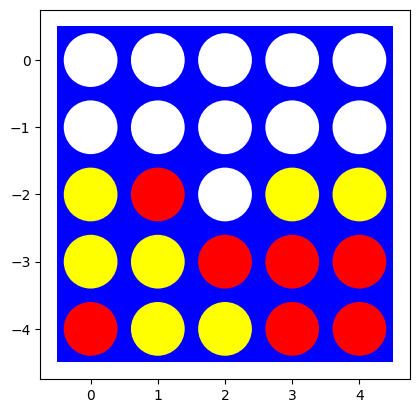

CPU times: total: 15.6 ms
Wall time: 14.6 ms


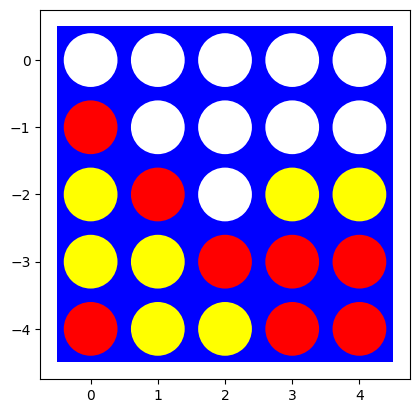

In [159]:
board = [[0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [-1, 1, 0, -1, -1],
         [-1, -1, 1, 1, 1],
         [1, -1, -1, 1, 1]]
board = np.array(board)
last_row_each_col = np.sum(board == 0, axis=0) - 1
visualize(board)
node = Node(board,last_row_each_col)
%time action, _ = alpha_beta_decision(node,-math.inf,+math.inf,0,4)

new_board, new_last_row_each_col = result(board, last_row_each_col, action, player(node.board))


visualize(new_board)# Your code/ answer goes here.

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

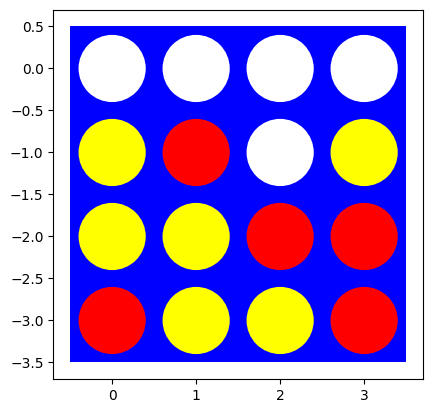

CPU times: total: 0 ns
Wall time: 3 ms


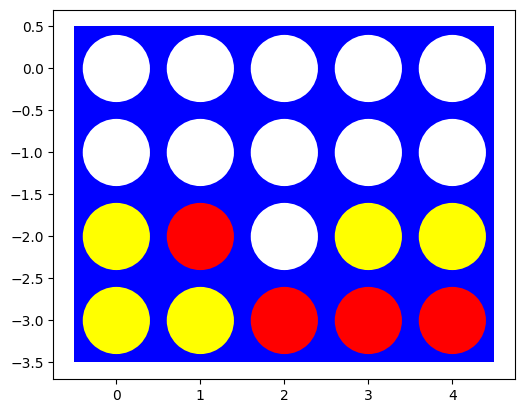

CPU times: total: 15.6 ms
Wall time: 17.5 ms


In [160]:
# Your code/ answer goes here.
board = [
         [0, 0, 0, 0],
         [-1, 1, 0, -1,],
         [-1, -1, 1, 1,],
         [1, -1, -1, 1,]]
board = np.array(board)

last_row_each_col = np.sum(board == 0, axis=0) - 1
visualize(board)
node = Node(board,last_row_each_col)
%time action, _ = alpha_beta_decision(node,-math.inf,+math.inf,0,4)

new_board, new_last_row_each_col = result(board, last_row_each_col, action, player(node.board))



board = [[0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [-1, 1, 0, -1, -1],
         [-1, -1, 1, 1, 1]]
board = np.array(board)
last_row_each_col = np.sum(board == 0, axis=0) - 1
visualize(board)
node = Node(board,last_row_each_col)
%time action, _ = alpha_beta_decision(node,-math.inf,+math.inf,0,4)

new_board, new_last_row_each_col = result(board, last_row_each_col, action, player(node.board))



### Playtime [5 points]

Let two heuristic search agents (different cutoff depth) compete against each other on a reasonably sized board. Since there is no randomness, you only need to let them play once.

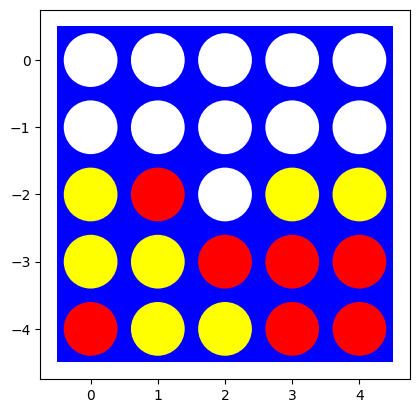

CPU times: total: 46.9 ms
Wall time: 42.6 ms


(0, 30)

In [161]:
# Your code/ answer goes here. 
# board = empty_board()
# last_row_each_col = [len(board) - 1] * len(board[0])
s = [
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [-1, 1, 0, -1, -1],
    [-1, -1, 1, 1, 1],
    [1, -1, -1, 1, 1]
]
board = np.array(s)
last_row_each_col = [0, 1, 2, 3, 1]  # chỉ 5 phần tử
current_node = Node(board, last_row_each_col)
alpha = -math.inf
beta = +math.inf
visualize(board)
%time alpha_beta_decision(current_node, alpha, beta, 0, 4)

## Challenge task [up to +10 bonus point will be awarded separately]

Find another student and let your best agent play against the other student's best player. We will set up a class tournament on Canvas. This tournament will continue after the submission deadline.

## Graduate student advanced task: Pure Monte Carlo Search and Best First Move [10 point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 bonus point].

### Pure Monte Carlo Search

Implement Pure Monte Carlo Search and investigate how this search performs on the test boards that you have used above.

In [162]:
# Your code/ answer goes here.

### Best First Move

Use your Monte Carlo Search to determine what the best first move for red is? Describe under what assumptions this is the "best" first move.  

In [163]:
# Your code/ answer goes here.